This notebook serves to compare the fine-tuning results between the 60 second input and 65 second.

Why the discrepancy: In their paper, Weimann et al claim to use 60 second inputs. However, in the Github repo, the suggested input to generate the input uses `pad` parameter value corresponding to approximately 65 seconds.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
PROJECT_DIR = '/content/drive/MyDrive/DLHProject'
JOB_DIR = PROJECT_DIR + '/jobs'
! ls $JOB_DIR

beat_classification	      finetune_pretrain_10_weights_65sec	 finetune__random_seed20
draft_demo		      finetune_pretrain_20_weights_65sec	 finetune__random_seed30
finetune60s__random_seed10    finetune_random_cnn_original_data		 initial-test__random_seed1
finetune60s__random_seed2024  finetune_random_cnn_original_data_with_f1
finetune_baseline_65sec       finetune__random_seed10


In [3]:
import pandas as pd

In [4]:
# 65s paths
JOBS_65 = {
    2024: 'finetune_baseline_65sec',
    10: 'finetune__random_seed10',
    # 20: 'finetune__random_seed20',
    # 30: 'finetune__random_seed30',
}

JOBS_60 = {
    2024: 'finetune60s__random_seed2024',
    10: 'finetune60s__random_seed10',
}

In [5]:
def read_results(base_dir, job_name):
    path = base_dir + '/' + job_name + '/history.csv'
    return pd.read_csv(path)

In [6]:
results_65 = {seed: read_results(JOB_DIR, path) for seed, path in JOBS_65.items()}

In [7]:
results_60 = {seed: read_results(JOB_DIR, path) for seed, path in JOBS_60.items()}

In [8]:
results_65[2024].head()

,epoch,acc,f1,loss,val_acc,val_loss
0,0,0.587490,0.308501,0.975869,0.622951,0.867372
1,1,0.652854,0.459062,0.816944,0.644028,0.933014
2,2,0.691321,0.586350,0.729423,0.711944,0.694799
3,3,0.724003,0.666203,0.658888,0.744731,0.704088
4,4,0.735887,0.625428,0.629763,0.679157,0.764776


In [9]:
results_60[2024].head()

,epoch,acc,f1,loss,val_acc,val_loss
0,0,0.601407,0.231586,0.959121,0.601874,0.962484
1,1,0.657545,0.407472,0.788906,0.665105,0.782736
2,2,0.694762,0.461724,0.717025,0.665105,0.754627
3,3,0.725880,0.621366,0.661118,0.728337,0.680819
4,4,0.746364,0.226835,0.631239,0.309133,2.618027


In [22]:
import matplotlib.pyplot as plt
import numpy as np

def compare(results_60, results_65, seed):
    fig, axes = plt.subplots(3)
    fig.suptitle(f'Comparison for seed={seed}')
    fig.subplots_adjust(hspace=0.5)
    epochs = np.arange(0, 200)
    df_60 = results_60[seed]
    df_65 = results_65[seed]

    # f1
    axes[0].plot(df_60['epoch'], df_60['f1'], label='60s')
    axes[0].plot(df_65['epoch'], df_65['f1'], label='65s')
    axes[0].set_title('Validation F1')
    axes[0].legend()

    # accuracy
    axes[1].plot(df_60['epoch'], df_60['val_acc'], label='60s')
    axes[1].plot(df_65['epoch'], df_65['val_acc'], label='65s')
    axes[1].set_title('Validation Accuracy')
    axes[1].legend()

    # loss
    axes[2].plot(df_60['epoch'], df_60['val_loss'], label='60s')
    axes[2].plot(df_65['epoch'], df_65['val_loss'], label='65s')
    axes[2].set_title('Validation Loss')
    axes[2].legend()

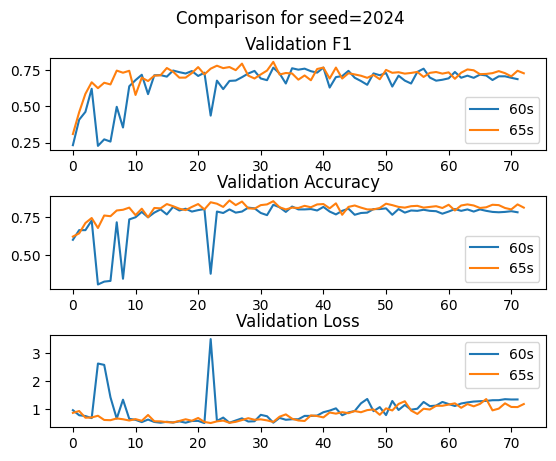

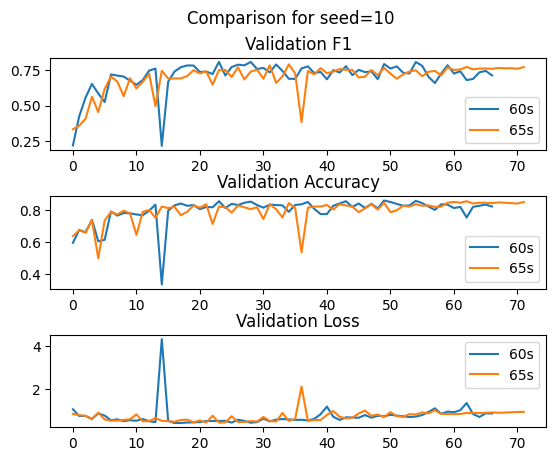

In [23]:
for seed in results_60.keys():
    compare(results_60, results_65, seed)